# Project work for *02901 Advanced Topics in Machine Learning: Computational Tools for Machine Learning in Python*

We will in this notebook present a reaanalyses of the MA2 process example in * Learning Summary Statistic for Approximate Bayesian Computation via Deep Neural Network* [link to paper](https://www.researchgate.net/publication/282691910_Learning_Summary_Statistic_for_Approximate_Bayesian_Computation_via_Deep_Neural_Network). 

For building and training the deep neural networks we use the PyTorch package. We also use Numpy for implementation of the ABC rejection sampling algorithm. Matplotlib is used for plotting.

### Setup

Load packages 

In [28]:
%matplotlib inline

import torch
import numpy as np 
import matplotlib as mpl
import matplotlib.pyplot as plt


Set ground-truth parameters and load data. 

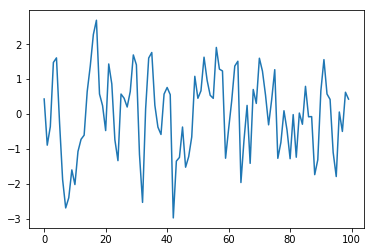

In [75]:
θ_true = np.array([0.6, 0.2]) # ground-truth parameter values 

ma2_data = np.genfromtxt('data/ma2_data.csv', delimiter=',') # load data 
obs_nbrs = ma2_data[1:101,0]
y_obs = ma2_data[1:101,1]

# plot datbba 
plt.plot(y_obs) 


### Train Network 

Load training, validation and test data. 

In [112]:
# load data from file 
X_training = np.genfromtxt("data/X_training.csv",delimiter=',')
X_val = np.genfromtxt("data/X_val.csv",delimiter=',')
X_test = np.genfromtxt("data/X_test.csv",delimiter=',')

y_training = np.genfromtxt("data/y_training.csv",delimiter=',')
y_val = np.genfromtxt("data/y_val.csv",delimiter=',')
y_test = np.genfromtxt("data/y_test.csv",delimiter=',')

# remove empty row 
X_training = X_training[1:len(X_training),:]
X_val = X_val[1:len(X_training),:]
X_test = X_test[1:len(X_training),:]

y_training = y_training[1:len(y_training),:]
y_val = y_val[1:len(y_val),:]
y_training = y_training[1:len(y_training),:]

# transpose input data 
X_training = np.transpose(X_training)
X_val = np.transpose(X_val)
X_test = np.transpose(X_test)

# convert to torch
X_training = torch.from_numpy(X_training)
X_val = torch.from_numpy(X_val)
X_test = torch.from_numpy(X_test)

y_training = torch.from_numpy(y_training)
y_val = torch.from_numpy(y_val)
y_test = torch.from_numpy(y_test)


Set up network 

### Run ABC inference 

Functions defining the MA2 process. 

In [ ]:
# Sample from the Uniform prior distribution
def sample_from_prior():
    while True:
        θ_1 = np.random.uniform(-2, 2)
        θ_2 = np.random.uniform(-1, 1) 
        if θ_2 + θ_1  >= -1 and θ_2 - θ_1 >= -1:
            return np.array([θ_1, θ_2])
    
    
# Evaluate prior distribtuion
def evaluate_prior(Θ):
    θ_1 = Θ[0]
    θ_2 = Θ[1]
    if abs(θ_1) <= 2 and abs(θ_2) <= 1 and θ_2 + θ_1 >= -1 and θ_2 - θ_1 >= -1:
        return True
    else:
        return False


# Generate data from the model
def generate_data(Θ):
    
    N_data=100
    θ_1 = Θ[0]
    θ_2 = Θ[1]
    y = np.zeros(N_data)

    if evaluate_prior(Θ):
        ϵ = np.random.normal(0,1,N_data)
        y[0] = ϵ[0]
        y[1] = ϵ[1] + θ_1*y[0]
        for i in  range(2,N_data):
            y[i] = ϵ[i] + θ_1*ϵ[i-1] + θ_2*ϵ[i-2]
    else:
        y[:] = np.nan
    return y